In [1]:
from sklearn.datasets import load_digits

In [2]:
data = load_digits()

In [4]:
print(data['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
X, y = data.data, data.target

In [6]:
X.shape, y.shape

((1797, 64), (1797,))

In [8]:
X[0,:]
#вся 1 строка

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [10]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


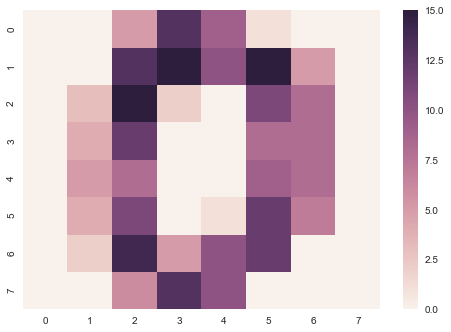

In [13]:
sns.heatmap(X[0,:].reshape((8,8)));

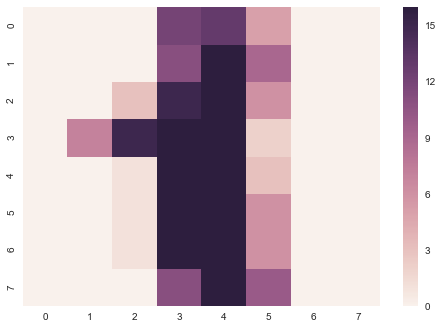

In [14]:
sns.heatmap(X[1,:].reshape((8,8)));

In [22]:
#количество 0,1,2...
np.bincount(y)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=17)

In [20]:
X_train.shape, X_test.shape

((1257, 64), (540, 64))

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [25]:
tree = DecisionTreeClassifier(max_depth = 10, random_state = 17)

In [26]:
logit = LogisticRegression(random_state=17)

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [31]:
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [33]:
from sklearn.metrics import accuracy_score

In [35]:
tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred)

0.8481481481481481

In [37]:
logit_pred = logit.predict(X_test)
accuracy_score(y_test, logit_pred)

0.94999999999999996

In [41]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.98333333333333328

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
params = {'max_depth': [1,2,3,5,10,20,30,40,50,64], 'max_features': [1,2,3,4,10,20,30,40,50,64]}

In [44]:
tree_grid = RandomizedSearchCV(tree, params, cv=5, n_jobs=-1)

In [46]:
%%time
tree_grid.fit(X_train, y_train)

Wall time: 6.49 s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best'),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 5, 10, 20, 30, 40, 50, 64], 'max_features': [1, 2, 3, 4, 10, 20, 30, 40, 50, 64]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [47]:
tree_grid.best_params_

{'max_depth': 10, 'max_features': 50}

In [48]:
tree_grid.best_score_

0.8233890214797136